## Linking Data

What we did in the Exploring Data and Exploring Maps notebooks doesn't yet give us the feeling of being able to *do* useful things!  For that to happen we need to be able to link the tabular data to the geodata to create a choropleth map.

In [2]:
import geopandas as gpd
import pandas as pd
from pathlib import Path

src_dir = Path.home() / Path('work/data/clean')

In [34]:
df  = pd.read_parquet(src_dir / 'ward_population.parquet')
gdf = gpd.read_parquet(src_dir / 'Jaipur_Wards.geoparquet')

<Axes: >

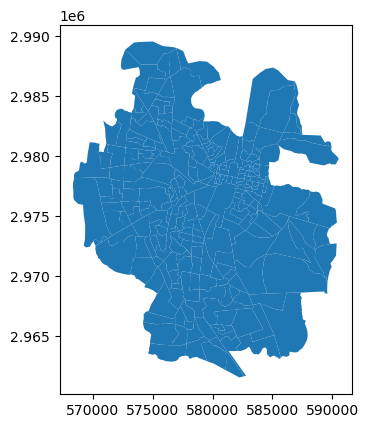

In [19]:
gdf.plot()

In [37]:
df.columns.to_list()

['State',
 'District',
 'Subdistt',
 'Town/Village',
 'Ward',
 'EB',
 'Level',
 'Name',
 'TRU',
 'No_HH',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_SC',
 'M_SC',
 'F_SC',
 'P_ST',
 'M_ST',
 'F_ST',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_P',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_P',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_P',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_P',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_P',
 'MARG_OT_3_6_M

<Axes: >

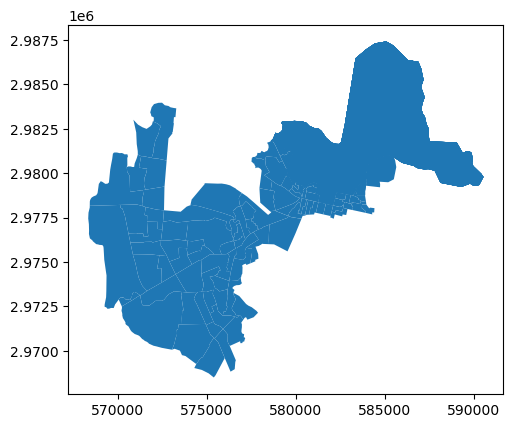

In [38]:
ward_gdf = gdf.set_index('Ward_No').join(df.set_index('Ward'), how='inner')
ward_gdf.plot()

<Axes: >

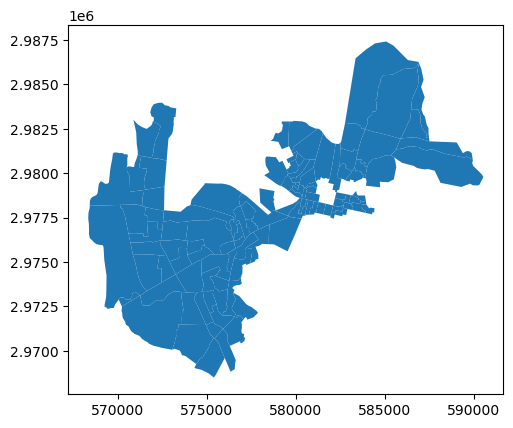

In [46]:
gdf.columns.to_list()

['Id',
 'AREA',
 'Ward_No',
 'POP',
 'DENS_PPH',
 'NAME',
 'geometry',
 'Area',
 'Ward_Numbe']

In [43]:
df.columns.to_list()

['State',
 'District',
 'Subdistt',
 'Town/Village',
 'Ward',
 'EB',
 'Level',
 'Name',
 'TRU',
 'No_HH',
 'TOT_P',
 'TOT_M',
 'TOT_F',
 'P_06',
 'M_06',
 'F_06',
 'P_SC',
 'M_SC',
 'F_SC',
 'P_ST',
 'M_ST',
 'F_ST',
 'P_LIT',
 'M_LIT',
 'F_LIT',
 'P_ILL',
 'M_ILL',
 'F_ILL',
 'TOT_WORK_P',
 'TOT_WORK_M',
 'TOT_WORK_F',
 'MAINWORK_P',
 'MAINWORK_M',
 'MAINWORK_F',
 'MAIN_CL_P',
 'MAIN_CL_M',
 'MAIN_CL_F',
 'MAIN_AL_P',
 'MAIN_AL_M',
 'MAIN_AL_F',
 'MAIN_HH_P',
 'MAIN_HH_M',
 'MAIN_HH_F',
 'MAIN_OT_P',
 'MAIN_OT_M',
 'MAIN_OT_F',
 'MARGWORK_P',
 'MARGWORK_M',
 'MARGWORK_F',
 'MARG_CL_P',
 'MARG_CL_M',
 'MARG_CL_F',
 'MARG_AL_P',
 'MARG_AL_M',
 'MARG_AL_F',
 'MARG_HH_P',
 'MARG_HH_M',
 'MARG_HH_F',
 'MARG_OT_P',
 'MARG_OT_M',
 'MARG_OT_F',
 'MARGWORK_3_6_P',
 'MARGWORK_3_6_M',
 'MARGWORK_3_6_F',
 'MARG_CL_3_6_P',
 'MARG_CL_3_6_M',
 'MARG_CL_3_6_F',
 'MARG_AL_3_6_P',
 'MARG_AL_3_6_M',
 'MARG_AL_3_6_F',
 'MARG_HH_3_6_P',
 'MARG_HH_3_6_M',
 'MARG_HH_3_6_F',
 'MARG_OT_3_6_P',
 'MARG_OT_3_6_M

In [51]:
gdf[~gdf.Ward_No.isin(ward_gdf.index)][['NAME','Ward_No','Ward_Numbe']]

,NAME,Ward_No,Ward_Numbe
0,ADARSH NAGAR,99.0,NaN
4,ADARSH NAGAR,78.0,NaN
5,ADARSH NAGAR,80.0,NaN
6,ADARSH NAGAR,79.0,NaN
7,ADARSH NAGAR,81.0,NaN
...,...,...,...
246,VIDHYADHAR NAGAR,NaN,38.0
247,VIDHYADHAR NAGAR,NaN,39.0
248,VIDHYADHAR NAGAR,NaN,40.0
249,VIDHYADHAR NAGAR,NaN,41.0


In [42]:
df[~df.ward_no.isin(ward_gdf.index)][['ward','area']]

AttributeError: 'DataFrame' object has no attribute 'ward_no'